# Uber Fare Prediction

## The main objective of project is to design an algorithm which will tell the fare to be charged for a passenger.

In [1]:
import numpy as np 
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Dataset

In [2]:
train_df = pd.read_csv(r'C:\Users\KIIT\Documents\LGM-Soc contributions\Uber Fare Prediction\Dataset/train.csv',nrows = 1000000)

In [3]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
train_df.shape

(1000000, 8)

In [5]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


## Data Preprocessing and Visualization

In [6]:
train_df.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64

### Eliminating *null* values

In [7]:
train_df.dropna(inplace=True)
train_df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [8]:
train_df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

### Change required columns into Datetime format

In [9]:
def change_into_datetime(col):
    train_df[col] = pd.to_datetime(train_df[col])

In [10]:
train_df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [11]:
for i in ['key','pickup_datetime']:
    change_into_datetime(i)

In [12]:
train_df.dtypes

key                       datetime64[ns]
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

### Extracting the year, month, date and week day of the ride

In [13]:
train_df['pickup_year'] = train_df['pickup_datetime'].dt.year
train_df['pickup_month'] = train_df['pickup_datetime'].dt.month
train_df['pickup_date'] = train_df['pickup_datetime'].dt.day
train_df['pickup_day_of_month'] = train_df['pickup_datetime'].dt.dayofweek

In [14]:
train_df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_date,pickup_day_of_month
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2014-09-13 21:44:38.000000100,7.0,2014-09-13 21:44:38+00:00,-73.976676,40.785630,-73.959196,40.775114,1,2014,9,13,5
999996,2010-09-20 14:50:37.000000200,7.3,2010-09-20 14:50:37+00:00,-73.992103,40.671385,-73.992103,40.671385,2,2010,9,20,0
999997,2013-04-26 14:03:00.000000118,10.5,2013-04-26 14:03:00+00:00,-73.978423,40.751135,-73.993397,40.762197,5,2013,4,26,4
999998,2011-07-08 00:29:00.000000990,6.9,2011-07-08 00:29:00+00:00,-73.980317,40.759482,-73.976832,40.743122,1,2011,7,8,4


### Extracting the Hour, Minute and Seconds value

In [15]:
def extract_hour(train_df,col):
    train_df[col + '_hour'] = train_df[col].dt.hour

def extract_minute(train_df,col):
    train_df[col + '_minute'] = train_df[col].dt.minute

def extract_second(train_df,col):
    train_df[col + '_second'] = train_df[col].dt.second

In [16]:
extract_hour(train_df,'pickup_datetime')
extract_minute(train_df,'pickup_datetime')
extract_second(train_df,'pickup_datetime')

In [17]:
train_df.drop(columns=['key','pickup_datetime'], axis=1, inplace=True)

In [18]:
train_df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_date,pickup_day_of_month,pickup_datetime_hour,pickup_datetime_minute,pickup_datetime_second
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,26,21
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,52,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,35,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,30,42
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,7.0,-73.976676,40.785630,-73.959196,40.775114,1,2014,9,13,5,21,44,38
999996,7.3,-73.992103,40.671385,-73.992103,40.671385,2,2010,9,20,0,14,50,37
999997,10.5,-73.978423,40.751135,-73.993397,40.762197,5,2013,4,26,4,14,3,0
999998,6.9,-73.980317,40.759482,-73.976832,40.743122,1,2011,7,8,4,0,29,0


### Removing the Latitude values that are greater than 90 or lesser than -90

In [19]:
train_df['pickup_latitude'].describe()

count    999990.000000
mean         39.929040
std           7.626087
min       -3116.285383
25%          40.734965
50%          40.752695
75%          40.767154
max        2621.628430
Name: pickup_latitude, dtype: float64

In [20]:
train_df['dropoff_latitude'].describe()

count    999990.000000
mean         39.919954
std           8.201418
min       -3114.338567
25%          40.734046
50%          40.753166
75%          40.768129
max        1651.553433
Name: dropoff_latitude, dtype: float64

In [21]:
len(train_df[train_df['pickup_latitude'] < -90 ]) #number of records which has latitude < -90

3

In [22]:
len(train_df[train_df['pickup_latitude'] > 90 ])  #number of records which has latitude > 90

9

In [23]:
len(train_df[train_df['dropoff_latitude'] < -90 ]) #number of records which has latitude < -90

4

In [24]:
len(train_df[train_df['dropoff_latitude']  > 90 ]) #number of records which has latitude > 90

8

In [25]:
train_df.drop(train_df[train_df['pickup_latitude'] < -90].index, axis = 0, inplace = True)
train_df.drop(train_df[train_df['pickup_latitude'] > 90].index, axis = 0, inplace = True)

train_df.drop(train_df[train_df['dropoff_latitude'] < -90].index, axis = 0, inplace = True)
train_df.drop(train_df[train_df['dropoff_latitude'] > 90].index, axis = 0, inplace = True)

### Removing the Longitude values that are greater than 180 or lesser than -180

In [26]:
train_df['pickup_longitude'].describe()

count    999970.000000
mean        -72.525339
std          10.693081
min       -1452.988333
25%         -73.992060
50%         -73.981792
75%         -73.967094
max          40.850357
Name: pickup_longitude, dtype: float64

In [27]:
train_df['dropoff_longitude'].describe()

count    999970.000000
mean        -72.521326
std          10.627740
min       -1329.621332
25%         -73.991385
50%         -73.980135
75%         -73.963654
max          45.581619
Name: dropoff_longitude, dtype: float64

In [28]:
len(train_df[train_df['pickup_longitude'] < -180])   #number of records which has longitude < -180

11

In [29]:
len(train_df[train_df['dropoff_longitude'] < -180])   #number of records which has longitude < -180

9

In [30]:
len(train_df[train_df['pickup_longitude'] > 180])   #number of records which has longitude > 180

0

In [31]:
len(train_df[train_df['dropoff_longitude'] > 180])   #number of records which has longitude > 180

0

In [32]:
train_df.drop(train_df[train_df['pickup_longitude'] < -180].index, axis = 0, inplace = True)

train_df.drop(train_df[train_df['dropoff_longitude'] < -180].index, axis = 0, inplace = True)

In [33]:
train_df.shape

(999950, 13)

### Calculating the Haversine Distance

In [34]:
def haversine_distance(pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude):
    
    data = [train_df]
    
    for i in data:
        R = 6371 # radius of the erth in kilometers
        phi1 = np.radians(i[pickup_latitude])
        phi2 = np.radians(i[dropoff_latitude])
        
        delta_phi = np.radians(i[dropoff_latitude] - i[pickup_latitude])
        delta_lambda = np.radians(i[dropoff_longitude] - i[pickup_longitude])
        
        a = np.sin(delta_phi / 2.0) **2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
        
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
        
        d = R * c
        
        i['harvesine_distance'] = d
        
    return d 

In [35]:
haversine_distance('pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude')

0         1.030764
1         8.450134
2         1.389525
3         2.799270
4         1.999157
            ...   
999995    1.879763
999996    0.000000
999997    1.761741
999998    1.842683
999999    0.758051
Length: 999950, dtype: float64

In [36]:
train_df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_date,pickup_day_of_month,pickup_datetime_hour,pickup_datetime_minute,pickup_datetime_second,harvesine_distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,26,21,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,52,16,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,35,0,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,30,42,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,51,0,1.999157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,7.0,-73.976676,40.785630,-73.959196,40.775114,1,2014,9,13,5,21,44,38,1.879763
999996,7.3,-73.992103,40.671385,-73.992103,40.671385,2,2010,9,20,0,14,50,37,0.000000
999997,10.5,-73.978423,40.751135,-73.993397,40.762197,5,2013,4,26,4,14,3,0,1.761741
999998,6.9,-73.980317,40.759482,-73.976832,40.743122,1,2011,7,8,4,0,29,0,1.842683


### Removing all the rows where passengers count is more than 6

In [37]:
train_df['passenger_count'].describe()

count    999950.000000
mean          1.684939
std           1.323897
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64

In [38]:
train_df[train_df['passenger_count'] > 6].count()

fare_amount               1
pickup_longitude          1
pickup_latitude           1
dropoff_longitude         1
dropoff_latitude          1
passenger_count           1
pickup_year               1
pickup_month              1
pickup_date               1
pickup_day_of_month       1
pickup_datetime_hour      1
pickup_datetime_minute    1
pickup_datetime_second    1
harvesine_distance        1
dtype: int64

In [39]:
train_df.drop(train_df[train_df['passenger_count'] > 6].index, axis = 0,inplace = True)

In [40]:
train_df[train_df['passenger_count'] > 6].count()

fare_amount               0
pickup_longitude          0
pickup_latitude           0
dropoff_longitude         0
dropoff_latitude          0
passenger_count           0
pickup_year               0
pickup_month              0
pickup_date               0
pickup_day_of_month       0
pickup_datetime_hour      0
pickup_datetime_minute    0
pickup_datetime_second    0
harvesine_distance        0
dtype: int64

### Preprocessing the target column -> Fare amount

In [41]:
train_df['fare_amount'].describe()

count    999949.000000
mean         11.347934
std           9.821777
min         -44.900000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

In [42]:
from collections import Counter
Counter(train_df['fare_amount'] < 0)  #counting nagetive records

Counter({False: 999911, True: 38})

In [43]:
train_df = train_df.drop(train_df[train_df['fare_amount'] < 0].index, axis = 0)
train_df.shape

(999911, 14)

In [44]:
train_df['fare_amount'].sort_values(ascending = False)

101885    500.0
247671    495.0
287638    450.0
233874    450.0
329010    450.0
          ...  
897211      0.0
489767      0.0
331597      0.0
520715      0.0
670254      0.0
Name: fare_amount, Length: 999911, dtype: float64

## Visualizing the data

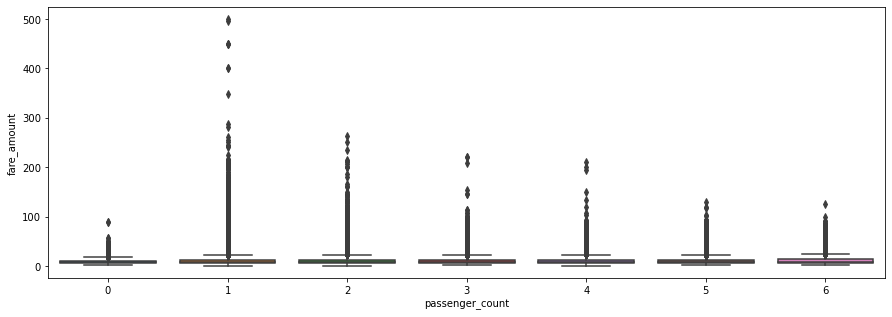

In [45]:
plt.figure(figsize=(15,5))
sns.boxplot(x ='passenger_count', y ='fare_amount', data = train_df.sort_values('fare_amount', ascending=False))

plt.savefig(r'C:\Users\KIIT\Documents\LGM-Soc contributions\Uber Fare Prediction\Images\boxplot_1.png')

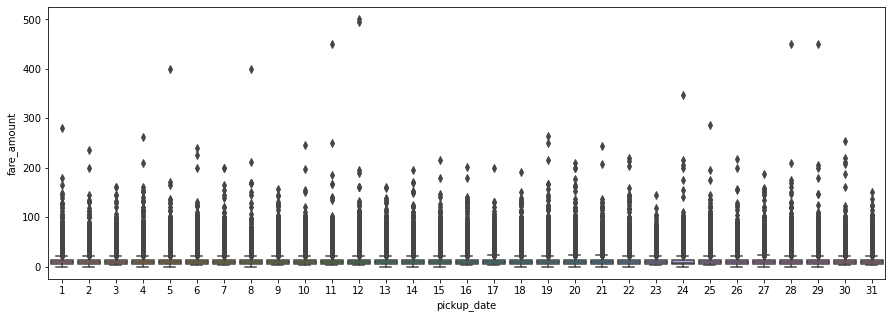

In [46]:
plt.figure(figsize=(15,5))
sns.boxplot(x ='pickup_date', y ='fare_amount', data = train_df.sort_values('fare_amount', ascending=False))

plt.savefig(r'C:\Users\KIIT\Documents\LGM-Soc contributions\Uber Fare Prediction\Images\boxplot_2.png')

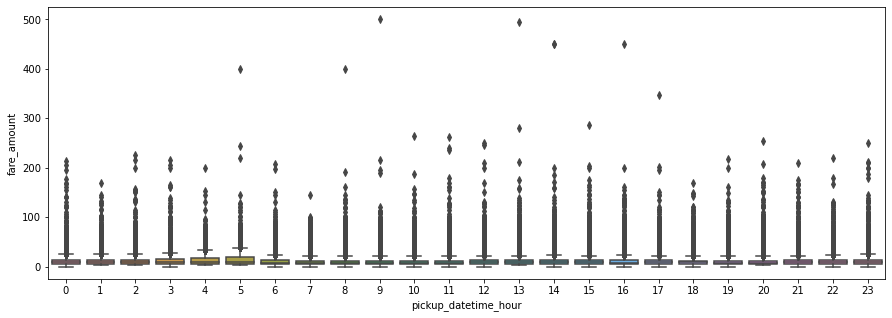

In [47]:
plt.figure(figsize=(15,5))
sns.boxplot(x ='pickup_datetime_hour', y ='fare_amount', data = train_df.sort_values('fare_amount', ascending=False))

plt.savefig(r'C:\Users\KIIT\Documents\LGM-Soc contributions\Uber Fare Prediction\Images\boxplot_3.png')

In [48]:
train_df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_date,pickup_day_of_month,pickup_datetime_hour,pickup_datetime_minute,pickup_datetime_second,harvesine_distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,26,21,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,52,16,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,35,0,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,30,42,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,51,0,1.999157


## Dealing with Outliers

In [49]:
def plot(df,col):
    fig, (ax1,ax2) = plt.subplots(2,1)
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2)

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


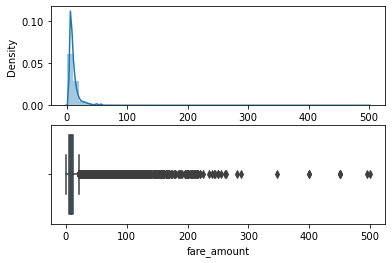

In [50]:
plot(train_df,'fare_amount')

plt.savefig(r'C:\Users\KIIT\Documents\LGM-Soc contributions\Uber Fare Prediction\Images\outlier_plot.png')

In [51]:
train_df['fare_amount'] = np.where(train_df['fare_amount']>=300,train_df['fare_amount'].median(),train_df['fare_amount'])

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


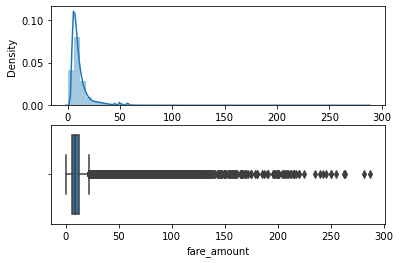

In [52]:
plot(train_df,'fare_amount')

plt.savefig(r'C:\Users\KIIT\Documents\LGM-Soc contributions\Uber Fare Prediction\Images\final_outlier_plot.png')

In [53]:
train_df.shape

(999911, 14)

## Splitting the data

In [54]:
X = train_df.drop('fare_amount', axis=1)
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_date,pickup_day_of_month,pickup_datetime_hour,pickup_datetime_minute,pickup_datetime_second,harvesine_distance
0,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,26,21,1.030764
1,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,52,16,8.450134
2,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,35,0,1.389525
3,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,30,42,2.799270
4,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,51,0,1.999157


In [55]:
X.shape

(999911, 13)

In [56]:
y = train_df['fare_amount']
y.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: fare_amount, dtype: float64

### Applying Train_Test_Split

In [57]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## Model training

### Defining a model to pass any algorithm and to calculate the r2_score, MAE, MSE, RMSE


In [59]:
def predict(algorithm):
    model = algorithm.fit(X_train,y_train)
    print('Training Score: {}'.format(model.score(X_train,y_train)))

    preds = model.predict(X_test)
    print('Predictions are: {}'.format(preds))
    print('\n')

    r2_score = metrics.r2_score(y_test,preds)
    print('r2_score is:{}'.format(r2_score))

    print('MAE:',metrics.mean_absolute_error(y_test,preds))
    print('MSE:',metrics.mean_squared_error(y_test,preds))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,preds)))
    sns.distplot(y_test-preds)

## Using RandomForestRegressor

Training Score: 0.9741125151372539
Predictions are: [ 7.623  6.452 11.108 ...  6.86  20.106  3.802]


r2_score is:0.8149741936584125
MAE: 1.8731125214214635
MSE: 17.434987907183864
RMSE: 4.175522471162605


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


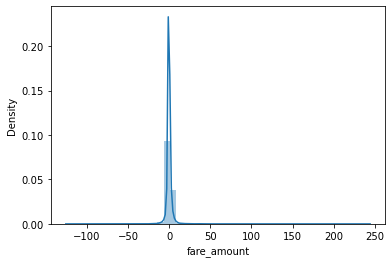

In [60]:
from sklearn.ensemble import RandomForestRegressor

model_1 = predict(RandomForestRegressor())

## Using Linear Regression

Training Score: 0.016480590676322793
Predictions are: [ 9.71712517 10.83745054  9.61470119 ... 10.29363551 11.24918243
 11.14026633]


r2_score is:0.01574971356300392
MAE: 5.950872813770451
MSE: 92.74593734233176
RMSE: 9.630469217142629


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


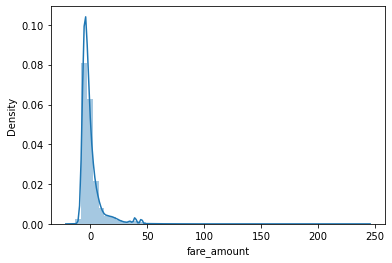

In [61]:
from sklearn.linear_model import LinearRegression

model_2 = predict(LinearRegression())

## Using KNNs

Training Score: 0.7837867894783347
Predictions are: [ 6.66  7.18 10.42 ...  6.5  17.24  5.22]


r2_score is:0.679549495185858
MAE: 2.8785172539665873
MSE: 30.19606176432997
RMSE: 5.495094336253925


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


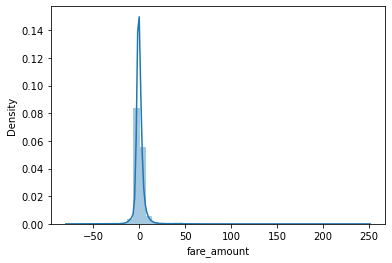

In [62]:
from sklearn.neighbors import KNeighborsRegressor

model_3 = predict(KNeighborsRegressor())

## Using Decision Tree 

Training Score: 0.9999261658016484
Predictions are: [11.7  6.1 11.3 ...  6.5 19.5  4.5]


r2_score is:0.6191912862226328
MAE: 2.639389048069086
MSE: 35.8836178095138
RMSE: 5.990293632996115


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


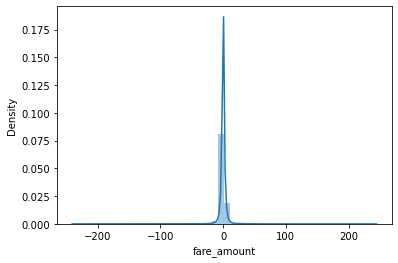

In [63]:
from sklearn.tree import DecisionTreeRegressor 

model_4 = predict(DecisionTreeRegressor())

## *As we can see that the Random Forest algorithm is giving the best accuracy(81%), therefore we will save this model locally and then perform predictions on the test set using this model*

In [66]:
import pickle

file = open(r'C:\Users\KIIT\Documents\LGM-Soc contributions\Uber Fare Prediction\Model/rf_model.pkl','wb')

In [67]:
pickle.dump(model_1, file)